In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronicaastorino","key":"683a83911189c413f6fd6cd65949231a"}'}

In [ ]:
from collections import Counter
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -q danofer/sarcasm/
!unzip /content/sarcasm.zip

kaggle.json
Archive:  /content/sarcasm.zip
  inflating: test-balanced.csv       
  inflating: test-unbalanced.csv     
  inflating: train-balanced-sarc.csv.gz  
  inflating: train-balanced-sarcasm.csv  


In [ ]:
import pandas as pd
import re
from textblob import TextBlob


In [ ]:
data = pd.read_csv('train-balanced-sarcasm.csv')

In [ ]:
data=data[['parent_comment','subreddit','label']]

In [ ]:
data.isna().sum()

parent_comment    0
subreddit         0
label             0
dtype: int64

In [ ]:
data.describe()

,label
count,1010826.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [ ]:
data.isna().sum()

parent_comment    0
subreddit         0
label             0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
data.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum]).sort_values(by='sum', ascending=False)

,size,mean,sum
subreddit,,,
AskReddit,65677,0.401465,26367
politics,39496,0.605378,23910
worldnews,26377,0.642529,16948
leagueoflegends,21037,0.542330,11409
pcmasterrace,18988,0.566674,10760
...,...,...,...
Tgifs,1,0.000000,0
TexasCHL,1,0.000000,0
TerrariaExchange,1,0.000000,0


In [ ]:
data

,parent_comment,subreddit,label
0,"Yeah, I get that argument. At this point, I'd ...",politics,0
1,The blazers and Mavericks (The wests 5 and 6 s...,nba,0
2,They're favored to win.,nfl,0
3,deadass don't kill my buzz,BlackPeopleTwitter,0
4,Yep can confirm I saw the tool they use for th...,MaddenUltimateTeam,0
...,...,...,...
1010821,"No one is calling this an engineered pathogen,...",reddit.com,1
1010822,In a move typical of their recent do-nothing a...,climate,1
1010823,Screw the Disabled--I've got to get to Church ...,atheism,1
1010824,I've always been unsettled by that. I hear a l...,worldnews,1


Feature Engineering for Logistic regression: Polarity, lenght of parent_comment, NGRAM AND TFIDF

In [ ]:
data['polarity']=data['parent_comment'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [ ]:
data['length']= data['parent_comment'].apply(lambda x:len(x))

In [ ]:
x = data[['parent_comment','subreddit','polarity','length']]
x.head(10)

,parent_comment,subreddit,polarity,length
0,"Yeah, I get that argument. At this point, I'd ...",politics,0.000000,80
1,The blazers and Mavericks (The wests 5 and 6 s...,nba,0.233333,134
2,They're favored to win.,nfl,0.800000,23
3,deadass don't kill my buzz,BlackPeopleTwitter,0.000000,26
4,Yep can confirm I saw the tool they use for th...,MaddenUltimateTeam,0.000000,85
5,do you find ariana grande sexy ?,AskReddit,0.500000,32
6,What's your weird or unsettling Trick or Treat...,AskReddit,-0.500000,53
7,Probably Sephiroth. I refuse to taint his grea...,FFBraveExvius,0.208333,111
8,What to upgrade? I have $500 to spend (mainly ...,pcmasterrace,0.114360,711
9,Probably count Kanye out Since the rest of his...,Lollapalooza,-0.003333,302


In [ ]:
train_x, train_y = x, data['label']

print(train_y)

0          0
1          0
2          0
3          0
4          0
          ..
1010821    1
1010822    1
1010823    1
1010824    1
1010825    1
Name: label, Length: 1010826, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 



In [ ]:
tfidf_comment = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
comment_sparse = tfidf_comment.fit_transform(train_x['parent_comment'])
print(comment_sparse)

  (0, 772)	0.2163044297938673
  (0, 4786)	0.3151198108381072
  (0, 4166)	0.314041715406686
  (0, 8466)	0.2673344437166209
  (0, 829)	0.2517934688297541
  (0, 3153)	0.2823707414028929
  (0, 9381)	0.16747634207788192
  (0, 739)	0.1310334330110928
  (0, 5379)	0.3229338639247273
  (0, 3882)	0.09209088242580529
  (0, 4785)	0.2790081948951106
  (0, 7060)	0.17366908060662375
  (0, 4075)	0.0897165272938755
  (0, 6290)	0.26588272675340996
  (0, 6209)	0.1933242360833174
  (0, 8419)	0.10780376467577216
  (0, 806)	0.1296192683349972
  (0, 712)	0.25590160536062595
  (0, 7767)	0.092345981839452
  (0, 3131)	0.1379580700809011
  (0, 9811)	0.19264371651317097
  (1, 4609)	0.2261189238727032
  (1, 7974)	0.28119477876457905
  (1, 3948)	0.11805797504950329
  (1, 8117)	0.2572053269549503
  :	:
  (1010824, 8601)	0.05416565082344687
  (1010824, 396)	0.05971469677855224
  (1010824, 7893)	0.1438135495213619
  (1010824, 3882)	0.06487595392492401
  (1010824, 7767)	0.13011133144032894
  (1010825, 5916)	0.308218598

In [ ]:
print(len(tfidf_comment.vocabulary_))

10000


In [ ]:
import scipy
from scipy.sparse import hstack,coo_matrix,csr_matrix

polartiy=scipy.sparse.csr_matrix(train_x['polarity'].values)
length=scipy.sparse.csr_matrix(train_x['length'].values)
train_x_sparse =hstack([comment_sparse,polartiy.T,length.T])

In [ ]:
print(train_x_sparse)

  (0, 772)	0.2163044297938673
  (0, 4786)	0.3151198108381072
  (0, 4166)	0.314041715406686
  (0, 8466)	0.2673344437166209
  (0, 829)	0.2517934688297541
  (0, 3153)	0.2823707414028929
  (0, 9381)	0.16747634207788192
  (0, 739)	0.1310334330110928
  (0, 5379)	0.3229338639247273
  (0, 3882)	0.09209088242580529
  (0, 4785)	0.2790081948951106
  (0, 7060)	0.17366908060662375
  (0, 4075)	0.0897165272938755
  (0, 6290)	0.26588272675340996
  (0, 6209)	0.1933242360833174
  (0, 8419)	0.10780376467577216
  (0, 806)	0.1296192683349972
  (0, 712)	0.25590160536062595
  (0, 7767)	0.092345981839452
  (0, 3131)	0.1379580700809011
  (0, 9811)	0.19264371651317097
  (1, 4609)	0.2261189238727032
  (1, 7974)	0.28119477876457905
  (1, 3948)	0.11805797504950329
  (1, 8117)	0.2572053269549503
  :	:
  (1010801, 10001)	380.0
  (1010802, 10001)	156.0
  (1010803, 10001)	321.0
  (1010804, 10001)	14.0
  (1010805, 10001)	59.0
  (1010806, 10001)	67.0
  (1010807, 10001)	191.0
  (1010808, 10001)	218.0
  (1010809, 10001)	5

Nested cross validation

---



Kfold and Hyperparameter Fine tuning with GRID SEARCH for Logistic regression

In [ ]:
import sklearn.linear_model as lm
from sklearn import pipeline,metrics
from sklearn import pipeline,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,precision_score
testsplit=[0.10,0.40,0.50,0.80]
score=[]
for i in testsplit:
  X_train, X_test, y_train, y_test = train_test_split(train_x_sparse, train_y, test_size=i, random_state=3)
  lr = lm.LogisticRegression(class_weight="balanced", tol = 0.0001)
  clf = pipeline.Pipeline([('lr', lr)])

  param_grid = {'lr__C': [10,14,15],
                  'lr__penalty':["l1","l2"]}

  f_scorer = metrics.make_scorer(f1_score, greater_is_better = True)

  model = GridSearchCV(estimator = clf, param_grid=param_grid, scoring=f_scorer,
                                     verbose=10, n_jobs=-1, iid=True, refit=True, cv=10)



  model.fit(X_train, y_train)
  print('test size',i)
  print("Best score: %0.3f" % model.best_score_)

  print("Best parameters set:")
  best_parameters = model.best_estimator_.get_params()
  for param_name in sorted(param_grid.keys()):
  	print("\t%s: %r" % (param_name, best_parameters[param_name]))
  list1=[model.best_score_,i,param_name,best_parameters[param_name]]
  score.append(list1)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarni

test size 0.1
Best score: 0.568
Best parameters set:
	lr__C: 15
	lr__penalty: 'l2'
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarni

test size 0.4
Best score: 0.569
Best parameters set:
	lr__C: 14
	lr__penalty: 'l2'
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarni

test size 0.5
Best score: 0.510
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0831s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1338s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (11.6881s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   42.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "r

test size 0.8
Best score: 0.284
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'


Logistic regression with best parameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_x_sparse, train_y, test_size=0.40, random_state=3)
lr = lm.LogisticRegression(class_weight="balanced", tol = 0.0001, C=14, penalty='l2')
LogisticRegression=lr.fit(X_train, y_train)
preds =LogisticRegression.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression results

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59    201686
           1       0.58      0.55      0.57    202645

    accuracy                           0.58    404331
   macro avg       0.58      0.58      0.58    404331
weighted avg       0.58      0.58      0.58    404331



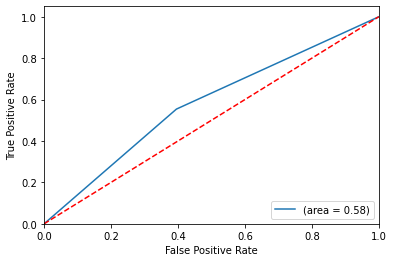

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(y_test,preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

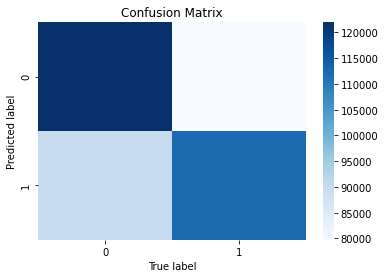

In [ ]:

cf_matrix = confusion_matrix(y_pred=preds, y_true=y_test)
sns.heatmap(cf_matrix, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.title('Confusion Matrix')


In [ ]:
prob=data[['parent_comment']].join(pd.DataFrame(model.predict_proba(x.T)))


In [ ]:
tfidf_comment = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
comment_sparse = tfidf_comment.fit_transform(data['parent_comment'])
polartiy=scipy.sparse.csr_matrix(data['polarity'].values)
length=scipy.sparse.csr_matrix(data['length'].values)
x =hstack([comment_sparse,polartiy.T,length.T])


In [ ]:
prob=data[['parent_comment']].join(pd.DataFrame(model.predict_proba(x)))

prob

,parent_comment,0,1
0,"Yeah, I get that argument. At this point, I'd ...",0.500145,0.499855
1,The blazers and Mavericks (The wests 5 and 6 s...,0.500243,0.499757
2,They're favored to win.,0.500042,0.499958
3,deadass don't kill my buzz,0.500047,0.499953
4,Yep can confirm I saw the tool they use for th...,0.500154,0.499846
...,...,...,...
1010821,"No one is calling this an engineered pathogen,...",0.500309,0.499691
1010822,In a move typical of their recent do-nothing a...,0.500271,0.499729
1010823,Screw the Disabled--I've got to get to Church ...,0.500096,0.499904
1010824,I've always been unsettled by that. I hear a l...,0.500410,0.499590


LSTM

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
def tokenize(text):
      tokenizer.fit_on_texts(text)
      xx=tokenizer.texts_to_sequences(text)
      return xx

Tokenizing parent_comment for Embeddings in LSTM

In [ ]:
tokenizer = Tokenizer(num_words=10000, lower= 1, oov_token="<OOV>")
tokenizer.fit_on_texts(data.parent_comment)
sequences = tokenizer.texts_to_sequences(data.parent_comment)
x=pad_sequences(sequences, padding='post',maxlen=len(max(sequences)))

In [ ]:
maxlen=len(max(sequences))

In [ ]:
y=data['label']

cross validation for Neural networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

In [ ]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.20, random_state=3)

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vecor_length, input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_t, y_t, validation_data=(X_v, y_v), epochs=5, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 32)            320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 374,221
Trainable params: 374,221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
20217/20217 [==============================] - 160s 8ms/step - loss: 0.6819 - accuracy: 0.5570 - val_loss: 0.6728 - val_accuracy: 0.5814
Epoch 2/5
20217/20217 [==============================] - 158s 8ms/step - loss: 0.6642 - accura

LSTM results

In [ ]:
preds=model.predict(X_test)

In [ ]:
predicted = (preds > 0.5).astype(np.int)
print(predicted)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58    100800
           1       0.58      0.56      0.57    101366

    accuracy                           0.57    202166
   macro avg       0.57      0.57      0.57    202166
weighted avg       0.57      0.57      0.57    202166



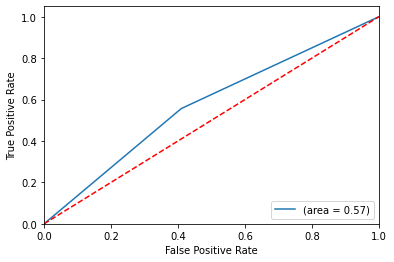

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(y_test,predicted)
fpr, tpr, thresholds = roc_curve(y_test, predicted)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

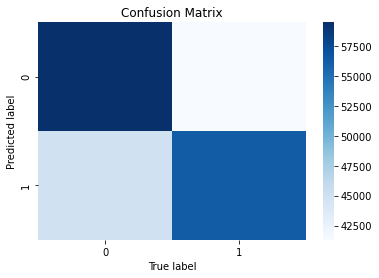

In [ ]:
cf_matrix = confusion_matrix(y_pred=predicted, y_true=y_test)
sns.heatmap(cf_matrix, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.title('Confusion Matrix')


BI-Directional LSTM

In [ ]:
embedding_vecor_length = 32
from keras.layers.merge import concatenate
from tensorflow.keras import layers
from keras.layers import Bidirectional
from tensorflow import keras
from keras.layers import TimeDistributed


cross validation for Neural networks

In [ ]:
model = Sequential()
model.add(Embedding(10000, embedding_vecor_length, input_length=maxlen))
#Left
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))  
#Right
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh', go_backwards=True)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_t, y_t, validation_data=(X_v, y_v), epochs=3, batch_size=64)


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 21, 32)            320000    
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 21, 200)           106400    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 21, 128)           135680    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 21, 1)             129       
Total params: 562,209
Trainable params: 562,209
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
10109/10109 [==============================] - 160s 15ms/step - loss: 0.6800 - accuracy: 0.5643 - val_loss: 0.6736 - val_accuracy: 0.5824
Epoch 2/3
10109/10109 [==============================] - 153s 15ms/step - loss: 0.6655 - acc

Bi-Directional LSTM Results

In [ ]:
preds=model.predict(X_test)

In [ ]:
pred=[]
for i in range(len(preds)):
  pred.append(max(preds[i]))

In [ ]:
pred=np.asarray(pred)

In [ ]:
predicted = (pred > 0.5).astype(np.int)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58    100800
           1       0.58      0.60      0.59    101366

    accuracy                           0.58    202166
   macro avg       0.58      0.58      0.58    202166
weighted avg       0.58      0.58      0.58    202166



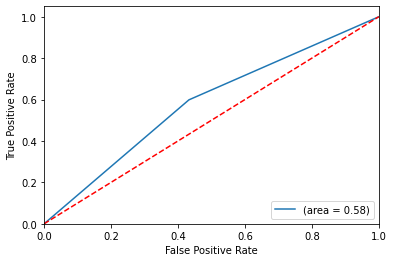

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(y_test,predicted)
fpr, tpr, thresholds = roc_curve(y_test, predicted)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

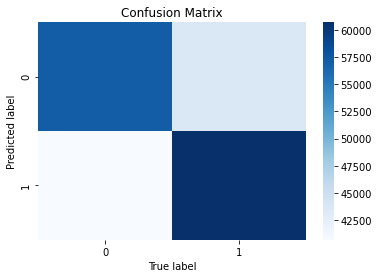

In [ ]:
cf_matrix = confusion_matrix(y_pred=predicted, y_true=y_test)
sns.heatmap(cf_matrix, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.title('Confusion Matrix')


Using Bert for word embeddings for LSTM

In [3]:
!pip install pytorch-pretrained-bert pytorch-nlp
!pip install -q bert-for-tf2
!pip install -q sentencepiece


     |████████████████████████████████| 133kB 6.7MB/s 
     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 133kB 10.6MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 7.6MB 13.2MB/s 
ERROR: botocore 1.20.78 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 1.2MB 8.2MB/s 


In [ ]:
import tensorflow as tf
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import random
import numpy as np
import matplotlib.pyplot as plt
import math

% matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

Found GPU at: /device:GPU:0


'Tesla T4'

BERT EMBEDDINGS

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
def tokenize(text):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))

In [ ]:
tokenize=data['parent_comment'].apply(lambda x:tokenize(x))

sequence = [[comment, data.label[i], len(comment)]
                 for i, comment in enumerate(tokenize)]

 
random.shuffle(sequence)

In [ ]:
sequence.sort(key=lambda x: x[2])
sorted_seq = [(comm[0], comm[1]) for comm in sequence]

In [ ]:
df = tf.data.Dataset.from_generator(lambda: sorted_seq, output_types=(tf.int32, tf.int32))
BATCH_SIZE = 32
batched_dataset = df.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

cross validation for Neural networks,

divided data into train and test
then divided train to train and valid to tune hyperparametrs,and the best fine tuned hyperparmeters are predicted on test

Best parameters selected with manual fine tuning

In [ ]:
TOTAL_BATCHES = math.ceil(len(sorted_seq) / BATCH_SIZE)
batched_dataset.shuffle(TOTAL_BATCHES)
train_data = batched_dataset.skip(10000)
valid_data=train_data.skip(18589)
train_data1=train_data.skip(2000)
test_data = batched_dataset.skip(20589)

In [ ]:
vocabulary_size = len(tokenizer.vocab)
embedding_dimensions = 200

In [ ]:
model = Sequential()
model.add(Embedding(vocabulary_size,embedding_dimensions))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_data1, validation_data=(valid_data), epochs=4, batch_size=64)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         6104400   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 6,224,901
Trainable params: 6,224,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
19589/19589 [==============================] - 1381s 68ms/step - loss: 0.6759 - accuracy: 0.5738 - val_loss: 0.6636 - val_accuracy: 0.5987
Epoch 2/4
19589/19589 [==============================] - 1445s 72ms/step - loss: 0.6423 - accuracy: 0.6258 - val_loss: 0.6428 - val_accuracy: 0.6558
Epoch 3/4
19589/19589 [==============================] - 1412s 70ms/ste

LSTM with BERT word embeddings results

In [ ]:
preds=model.predict(test_data)
import numpy as np
predicted = (preds > 0.5).astype(np.int)
test = tf.concat([y for x, y in test_data], axis=0)

Text(0.5, 1.0, 'Confusion Matrix')

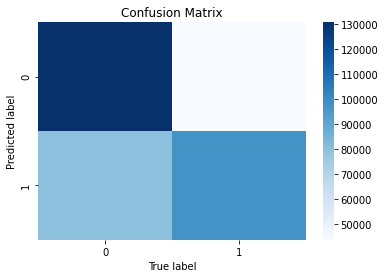

In [ ]:
cf_matrix = confusion_matrix(y_pred=predicted, y_true=test)
sns.heatmap(cf_matrix, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.title('Confusion Matrix')


In [ ]:
print(classification_report(test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68    174315
           1       0.69      0.55      0.61    177663

    accuracy                           0.65    351978
   macro avg       0.66      0.65      0.65    351978
weighted avg       0.66      0.65      0.64    351978



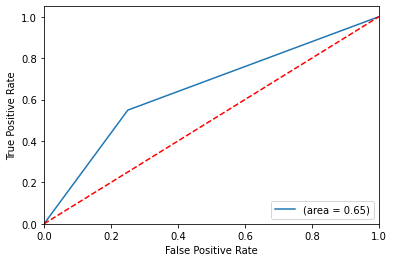

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(test,predicted)
fpr, tpr, thresholds = roc_curve(test, predicted)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic regression = 58%

LSTM = 57%

Bi directional Lstm = 58%

Lstm with Bert = 65%